# 심화 학습 : 서포트 벡터 머신

## 서포트 벡터 머신의 동기

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


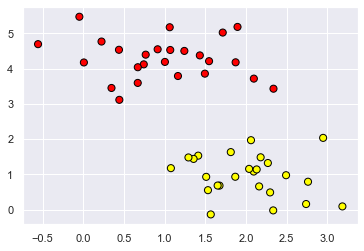

In [2]:
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples = 50, centers = 2, random_state = 0, cluster_std = 0.60)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor='black')

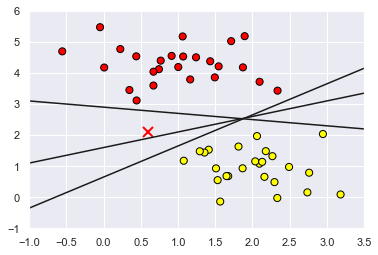

In [3]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor='black')
plt.plot([0.6], [2.1], 'x', color = 'red', markeredgewidth=2, markersize=10)
plt.xlim(-1, 3.5)
plt.ylim(-1, 6)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit + b, '-k')

## 서포트 벡터 머신 : 마진 최대화

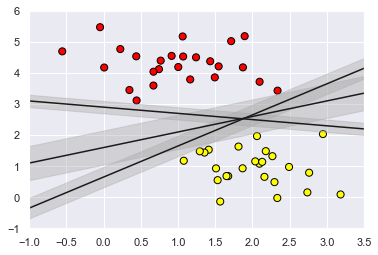

In [4]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor='black')
plt.xlim(-1, 3.5)
plt.ylim(-1, 6)

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor = 'none', color = '#AAAAAA', alpha = 0.4)

### 서포트 벡터 머신 적합하기

In [5]:
from sklearn.svm import SVC
model = SVC(kernel = 'linear', C = 1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

In [6]:
def plot_svc_decision_function(model, ax = None, plot_support = True):
    ''' 2차원 SVC를 위한 의사결정 함수 플로팅하기'''
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # 모델 평가를 위한 그리드 생성
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # 의사결정 경계와 마진 플로팅
    ax.contour(X, Y, P, colors = 'k', levels = [-1, 0, 1], alpha = 0.5, linestyles = ['--', '-', '--'])
    
    # 서포트 벡터 플로팅
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, linewidth = 1, facecolors='none')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

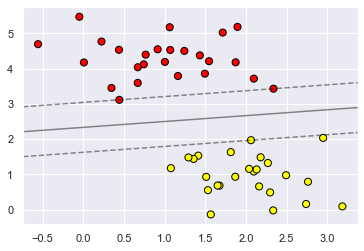

In [7]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
plot_svc_decision_function(model)

In [8]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [9]:
def plot_svm(N = 10, ax = None):
    X, y = make_blobs(n_samples = 200, centers = 2, random_state = 0, cluster_std = 0.60)
    X = X[:N]
    y = y[:N]
    
    model = SVC(kernel = 'linear', C = 1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

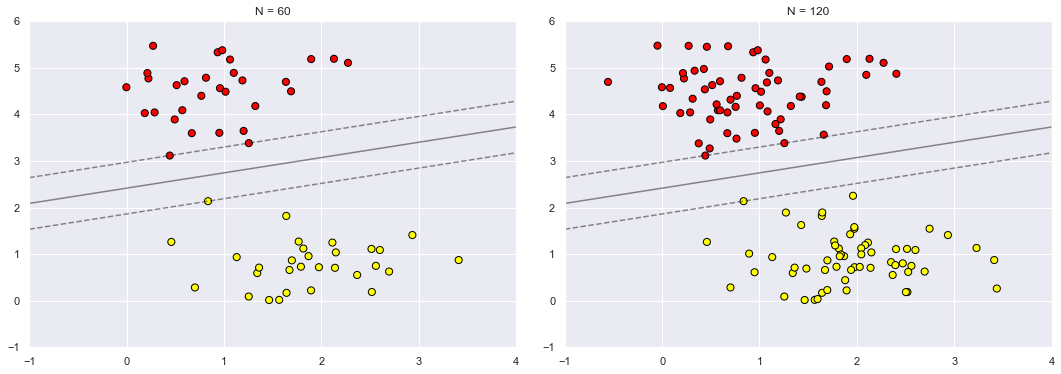

In [10]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In [11]:
from ipywidgets import interact, fixed
interact(plot_svm, N = [10, 60, 200], ax = fixed(None))

interactive(children=(Dropdown(description='N', options=(10, 60, 200), value=10), Output()), _dom_classes=('wi…

<function __main__.plot_svm(N=10, ax=None)>

### 선형 경계 너머 : 커널 SVM

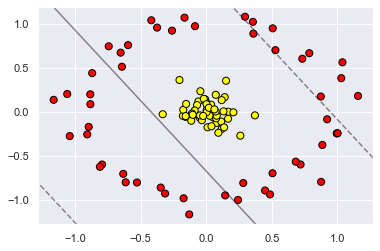

In [12]:
from sklearn.datasets.samples_generator import make_circles

X, y = make_circles(100, factor=.1, noise=.1, random_state = 42)

clf = SVC(kernel = 'linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
plot_svc_decision_function(clf, plot_support = False)

In [13]:
r = np.exp(-(X ** 2).sum(1))

In [14]:
from mpl_toolkits import mplot3d

def plot_3D(elev = 30, azim = 30, X = X, y = y):
    ax = plt.subplot(projection = '3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
    ax.view_init(elev = elev, azim = azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

In [15]:
interact(plot_3D, elev = [-90, 30, 90], azip = [-180, 180], X = fixed(X), y = fixed(y))

interactive(children=(Dropdown(description='elev', index=1, options=(-90, 30, 90), value=30), IntSlider(value=…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 0.01004783, -0.17510486],
       [ 0.14058191,  0.16717858],
       [-0.059743  ,  0.11848299],
       [ 0.71938348, -0.59898403],
       [ 0.87586276, -0.79693694],
       [ 0.28238185, -0.8096356 ],
       [-0.88398798,  0.19969581],
       [-0.04821718, -0.06689042],
       [ 0.35579647,  1.02466875],
       [ 0.92202981, -0.08438964],
       [-0.65247738,  0.67395748],
       [-0.79396809, -0.59912738],
       [ 0.16649451, -0.0776401 ],
       [-0.61403158, -0.80193362],
       [ 0.11817221,  0.13361695],
       [ 1.03859873,  0.56412698],
       [-0.06990555,  0.07712972],
       [-0.15789052, -0.05648558],
       [-0.08545191,  0.97514198],
       [-0.6327045 , -0.70551635],
       [ 0.00349741,  0.02280071],
       [ 0.07868738, -0.12537914],
       [-0.90712258, -0.25646566],
       [ 0.4487963 , -0.89499225],
       [-0.20389193,  0.36282105],
       [-0.41864357,  1.04254495],
       [ 0.24241093, -1.00243527],
       [

In [16]:
clf = SVC(kernel = 'rbf', C = 1E6)
clf.fit(X, y)

SVC(C=1000000.0)

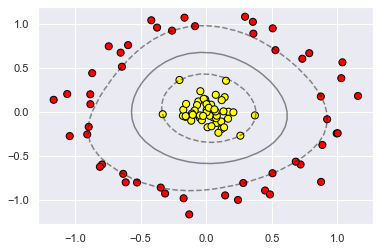

In [17]:
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')

### SVM 조정하기 : 마진을 부드럽게 하기

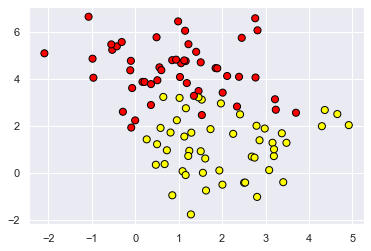

In [18]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 1.2)
plt.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')

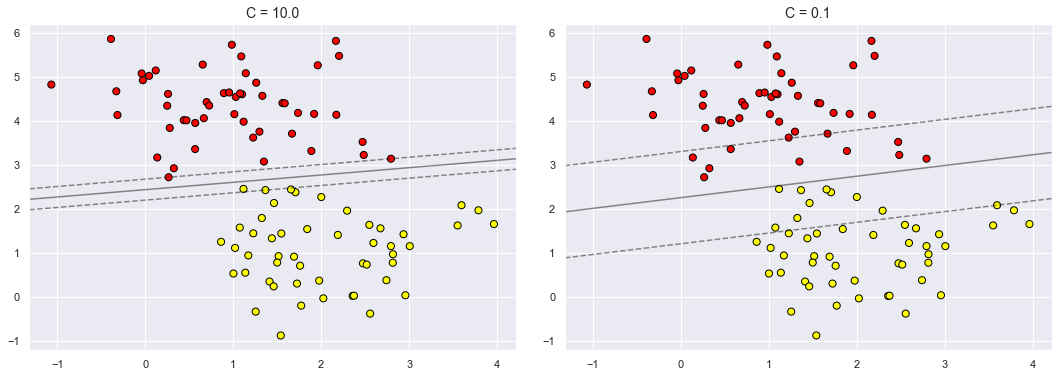

In [19]:
X, y = make_blobs(n_samples = 100, centers = 2, random_state = 0, cluster_std = 0.8)

fig, ax = plt.subplots(1, 2, figsize = (16, 6))
fig.subplots_adjust(left = 0.0625, right = 0.95, wspace = 0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel = 'linear', C = C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c = y, s = 50, cmap = 'autumn', edgecolor = 'black')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 300, lw = 1, facecolors = 'none')
    axi.set_title('C = {0:.1f}'.format(C), size = 14)

## 예제 : 안면 인식

In [20]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person = 60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


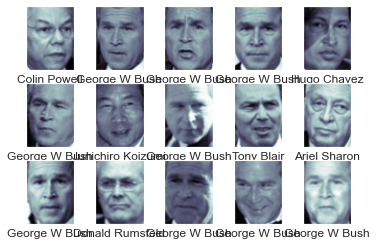

In [21]:
fig, ax = plt.subplots(3, 5)

for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap = 'bone')
    axi.set(xticks=[], yticks=[], xlabel = faces.target_names[faces.target[i]])

In [22]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components = 150, whiten = True, random_state = 42)
svc = SVC(kernel = 'rbf', class_weight = 'balanced')
model = make_pipeline(pca, svc)

In [23]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state = 42)

In [24]:
from sklearn.model_selection import GridSearchCV

param_grid = {'svc__C' : [1, 5, 10, 50], 'svc__gamma' : [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 2min 7s
{'svc__C': 10, 'svc__gamma': 0.001}


In [25]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Text(0.5, 0.98, 'Predicted Names; Incorrect Labels in Red')

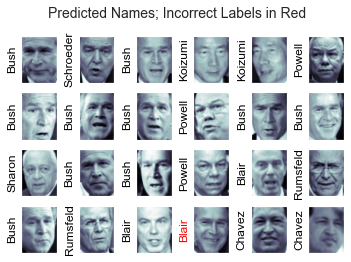

In [26]:
fig, ax = plt.subplots(4, 6)

for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap = 'bone')
    axi.set(xticks = [], yticks = [])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1], color = 'black' if yfit[i] == ytest[i] else 'red')

fig.suptitle('Predicted Names; Incorrect Labels in Red', size = 14)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



Text(89.18, 0.5, 'predicted label')

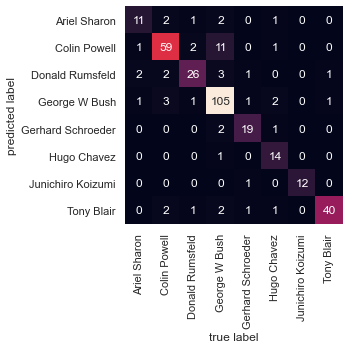

In [28]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = faces.target_names, yticklabels = faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

## 서포트 벡터 머신 정리

1. 장점
    * 비교적 적은 수의 서포트 벡터에 의존하기 때문에, 매우 간결한 모델이며 매우 적은 메모리를 사용한다.
    * 모델이 훈련되고 나면 예측 단계가 매우 빨리 수행된다.
    * 마진에 인접한 점에 의해서만 영향을 받기 때문에 고차원 데이터에서 잘 동작하며, 다른 알고리즘에서는 도전적인 경우에 해당하는 표본보다 높은 차원의 데이터에 대해서도 잘 동작한다.
    * 커널 메서드와 통합하면 여러 유형의 데이터에 적응시킬 수 있어 다양한 용도로 사용할 수 있다.<br><br>
2. 단점
    * 표본 N의 개수에 따라 모델의 복잡도가 최악의 경우 O[N^3], 효율적으로 구현되면 O[N^2]까지 가능하다. 훈련 표본의 개수가 크면 이 계산 비용이 어마어마하게 커질 수 있다.
    * 결과가 마진 강도 조정 모수인 C를 적절하게 선택했느냐에 따라 전적으로 달라진다. 이 값은 교차 검증을 통해 신중하게 선택해야 하는데, 데이터세트가 커질수록 비용이 커질 수 있다.
    * 결과에 대해서 직접적으로 확률적 해석을 할 수 없다. 이는 내부 교차 검증을 통해 추정할 수 있지만, 이 부가적인 추정 과정 또한 많은 비용이 발생한다.